# Explore dataset

## Download icons dataset

In [1]:
import kaggle
from definitions import *

kaggle.api.authenticate()
kaggle.api.dataset_download_files(dataset_name, path=raw_data_dir, unzip=True, quiet=False)

common-mobile-web-app-icons.zip: Skipping, found more recently modified local copy (use --force to force download)


## Analize dataset's files

Get labels from dataset directory

In [2]:
import os

labels = [f.name for f in os.scandir(raw_data_dir) if f.is_dir()]

Create list of all images in dataset

In [3]:
files = []
for label in labels:
    label_dir = os.path.join(raw_data_dir, label)
    files += [os.path.join(label_dir, f.name) for f in os.scandir(label_dir) if f.is_file()]

# Remove not images from dataset
not_jpg = [f for f in files if not f.endswith(".jpg")]
files = [file for file in files if file not in not_jpg]

Shuffle files

In [4]:
import random

random.shuffle(files)

### Show sample images

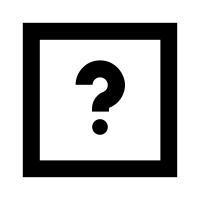

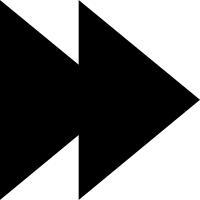

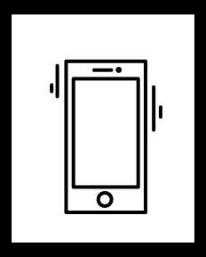

In [5]:
import IPython.display as display

for _ in range(3):
    image_path = random.choice(files)
    display.display(display.Image(image_path))

## Find duplicated images

In [6]:
from collections import Counter

# Find images that are present in multiple labels
fnames = [file.split("\\")[-1] for file in files]
duplicated_names = [(name, count) for name, count in Counter(fnames).items() if count > 1]
duplicated_names = sorted(duplicated_names, key=lambda x: x[1], reverse=True)

duplicated_names[:15]

[('~7636c9f8da9a82f9.jpg', 7),
 ('_7636c9f8da9a82f9.jpg', 7),
 ('_71c642b31e5890a1.jpg', 6),
 ('~71c642b31e5890a1.jpg', 6),
 ('~f5e0d92dab954478.jpg', 5),
 ('_82eec5ad244bc79d.jpg', 5),
 ('_f5e0d92dab954478.jpg', 5),
 ('~82eec5ad244bc79d.jpg', 5),
 ('_f3ac971cf0d3cf59.jpg', 5),
 ('_b717e2fa17208265.jpg', 5),
 ('~b717e2fa17208265.jpg', 5),
 ('~f3ac971cf0d3cf59.jpg', 5),
 ('~17744bb6a4ed1d9d.jpg', 4),
 ('_96c5023576733f88.jpg', 4),
 ('~96c5023576733f88.jpg', 4)]

## Get list of images sizes 
(**This may take several minutes**)

In [ ]:
from PIL import Image

i = 0
limit = 20000 # Set limit to speed it up
images_sizes = Counter()
for i, image_path in enumerate(files[:limit]):
    with Image.open(image_path) as img:
        images_sizes[img.size] += 1 # (width, height)
    if (i + 1) % (limit // 100) == 0:
        print("\rProcessed %d out of %d images" % (i + 1, limit), end="")
        
images_sizes.most_common(10)

Processed 2600 out of 20000 images

## Count images for each label 

In [7]:
images_count_org = Counter()
images_count_aug = Counter()
for file in files:
    label = file.split("\\")[-2]
    name = file.split("\\")[-1]
    
    if name.startswith("_"):
        images_count_org[label] += 1
    else:
        images_count_aug[label] += 1

In [8]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

count_data = []
for label, org_count in dict(images_count_org).items():
    aug_count = images_count_aug[label]
    count_data.append((label, org_count, aug_count, org_count + aug_count))
    
count_data = sorted(count_data, reverse=True, key=lambda x: x[3])
labels, org_count, aug_count, sum_count = zip(*count_data)

trace_org = go.Bar(
    x=labels,
    y=org_count,
    name='Orginal images count'
)
trace_aug = go.Bar(
    x=labels,
    y=aug_count,
    name='Augmented images count'
)

data = [trace_org, trace_aug]
layout = go.Layout(
    barmode='stack',
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')